In [86]:
%matplotlib inline
import pylab as pl
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

In [161]:
from astropy.table import Table
from astropy.visualization import simple_norm
from astropy import units as u
import numpy as np
import pandas as pd

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [159]:
import dust_extinction
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC
from dust_extinction.parameter_averages import CCM89

In [139]:
distance_modulus = 5*np.log10(8500)-5
distance_modulus

14.647094628571466

In [132]:
mist = Table.read('/orange/adamginsburg/cmz/sgre/MIST_iso_65301c575f9fc_VVV.iso.cmd',
                  header_start=12, data_start=13, format='ascii', delimiter=' ', comment='#')
mist[:5]

EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],VISTA_Z,VISTA_Y,VISTA_J,VISTA_H,VISTA_Ks,phase
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
23,5.0,0.1549504467031604,0.15495042038352222,3.492262461966795,3.030913225174413,-0.48061022765371253,0.0,0.041798,5.434965,4.671983,3.924381,3.216089,3.053531,-1.0
24,5.0,0.16090471535689013,0.1609046869992652,3.494601625688686,3.026269963981724,-0.4517319382495324,0.0,0.041798,5.357027,4.603447,3.859414,3.138312,2.980057,-1.0
25,5.0,0.166893640928868,0.16689361042934317,3.4969338015925633,3.0218133025786247,-0.42298160014247677,0.0,0.041798,5.279412,4.535377,3.794919,3.061436,2.906965,-1.0
26,5.0,0.17291878111786002,0.172918748369505,3.499259690878638,3.017500107676793,-0.39430938290525047,0.0,0.041798,5.201993,4.467677,3.730798,2.985498,2.834152,-1.0
27,5.0,0.17897842247122703,0.1789783873650338,3.501579492127857,3.0133506753074393,-0.36573906977649895,0.0,0.041798,5.124815,4.400429,3.667135,2.910741,2.761711,-1.0


In [134]:
mist.columns

<TableColumns names=('EEP','log10_isochrone_age_yr','initial_mass','star_mass','log_Teff','log_g','log_L','[Fe/H]_init','[Fe/H]','VISTA_Z','VISTA_Y','VISTA_J','VISTA_H','VISTA_Ks','phase')>

In [5]:
catalog = Table.read('/orange/adamginsburg/cmz/sgre/sgrE.csv')

In [6]:
catalog[:5]

sourceid,astfit_epochs,astfit_params,duplicate,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,chisq,uwe,phot_z_mean_mag,phot_z_std_mag,phot_z_n_epochs,z_n_obs,z_n_det,z_n_amb,phot_y_mean_mag,phot_y_std_mag,phot_y_n_epochs,y_n_obs,y_n_det,y_n_amb,phot_j_mean_mag,phot_j_std_mag,phot_j_n_epochs,j_n_obs,j_n_det,j_n_amb,phot_h_mean_mag,phot_h_std_mag,phot_h_n_epochs,h_n_obs,h_n_det,h_n_amb,phot_ks_mean_mag,phot_ks_std_mag,phot_ks_n_epochs,ks_n_obs,ks_n_det,ks_n_amb,l,b,pml,pmb,epml,epmb,pml_pmb_corr
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
13640652012519,131,5,0,2014.0,265.47527028748385,8.520268526342889,-30.082069533748683,7.700276445246343,-25.019673424488488,11.229321123017735,-9.39434212701699,3.746437150951136,2.465794557851089,3.9216550851764183,0.037128516,0.49996337,0.2226159,4.1377643e-05,0.07426248,0.0024231279,0.26694664,0.032629237,8.2761355e-05,2.7004398e-06,141.88382,0.7430189,--,--,0,5,0,0,--,--,0,5,0,0,--,--,0,18,0,0,17.739616,0.033628497,4,12,5,0,16.693588,0.1866688,130,209,131,0,358.6000198032932,0.08798643385588463,-2.8645243540643746,9.280533579742894,3.8736354612493833,3.796065772319169,0.040963077269144645
13640652021185,199,5,0,2014.0,265.47587937535565,1.4952900845417245,-30.082307497598688,1.6238537564196083,0.6187527443958151,2.181556816115594,-1.5468526542629006,0.8080728730216988,-7.7083601842355,0.8615810307208838,0.024147538,0.34280336,0.16988152,-0.0016209816,0.07044137,-0.0036662058,0.20883442,-0.052046202,-0.0047286046,0.00024610592,135.11438,0.58634675,--,--,0,5,0,0,--,--,0,5,0,0,18.047544,0.1205448,16,18,16,0,15.659846,0.050400823,10,12,10,0,14.527815,0.11108203,199,204,199,0,358.6000958934293,0.08741318271225816,-7.363516442886434,-2.7550292689323994,0.8471028491318309,0.823237672712744,0.05732593534318079
13640652002403,36,5,0,2014.0,265.47623367771,17.36719993976457,-30.081477713404464,16.079636311507212,-11.26570833799203,21.633631332459174,-4.842131253973115,9.37917073050841,0.8236193105168164,9.598208375822745,0.034893055,0.43887174,0.4068617,0.0003922528,0.07950627,0.015952827,0.32983425,0.20064868,0.0008937755,0.00017933488,48.750042,0.8530021,--,--,0,5,0,0,--,--,0,5,0,0,19.575438,0.0,1,18,1,0,17.8078,0.0,1,12,1,0,16.903559,0.19089681,35,204,36,0,358.6009624912795,0.08759078855484356,-1.8563559723180827,4.547364629995777,9.538443692164588,9.439942894239984,0.02061710356674774
13640652015378,201,5,0,2014.0,265.47639702441813,0.8629256144418578,-30.081967879477684,0.6825569332025273,0.22135357208481532,1.2306631833372035,-5.052279090117802,0.31263832578663436,-8.840605173631197,0.32480965410729473,0.05517868,0.6170349,0.007042514,-0.0042296634,0.08942554,-0.0016967654,-0.029175172,-0.018974056,-0.00685482,0.00013006375,175.13864,0.6641952,--,--,0,5,0,0,18.317852,0.03617285,5,5,5,0,15.654171,0.013074658,16,18,16,0,13.132054,0.010327967,10,12,10,0,11.917759,0.02636093,200,204,201,0,358.6006207808484,0.08721200674868229,-10.175506171533263,-0.3753371599560831,0.3214832046753249,0.3160578479498499,0.03417549108494654
13644749012214,168,5,0,2014.0,265.5169150419438,2.663316560112951,-30.104416975653855,2.2288889381169583,-6.273909269286516,3.6048734103906406,-4.803407879418762,1.252745232530345,-4.564742697252113,1.3549318835325534,0.024807738,0.41331413,0.13149782,-4.204709e-05,0.06002151,-0.0026207431,0.18129672,-0.043663397,-0.00010173156,4.4419453e-06,268.14877,0.90006506,--,

In [7]:
pm_l = catalog['pml']
pm_b = catalog['pmb']

(-100.0, 100.0)

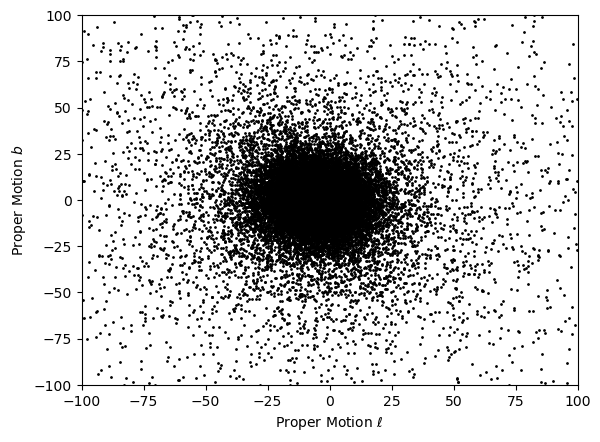

In [22]:
pl.scatter(pm_l, pm_b, s=1, color='k')
pl.xlabel("Proper Motion $\ell$")
pl.ylabel("Proper Motion $b$")

pl.xlim(-100, 100)
pl.ylim(-100, 100)

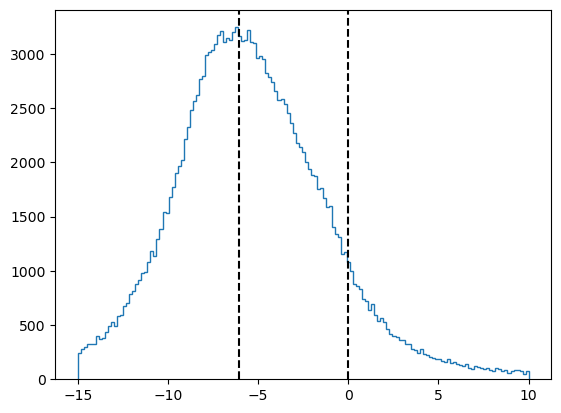

In [58]:
counts, bins = np.histogram(pm_l, bins=np.linspace(-15, 10, num=150))
plt.stairs(counts, bins)
plt.axvline(0, linestyle='dashed', color='k')
plt.axvline(np.mean(pm_l), linestyle='dashed', color='k')
print()

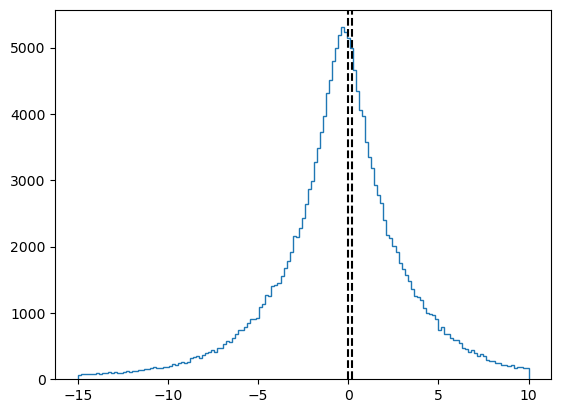

In [59]:
counts, bins = np.histogram(pm_b, bins=np.linspace(-15, 10, num=150))
plt.stairs(counts, bins)
plt.axvline(0, linestyle='dashed', color='k')
plt.axvline(np.mean(pm_b), linestyle='dashed', color='k')
print()

In [61]:
catalog.columns

<TableColumns names=('sourceid','astfit_epochs','astfit_params','duplicate','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','chisq','uwe','phot_z_mean_mag','phot_z_std_mag','phot_z_n_epochs','z_n_obs','z_n_det','z_n_amb','phot_y_mean_mag','phot_y_std_mag','phot_y_n_epochs','y_n_obs','y_n_det','y_n_amb','phot_j_mean_mag','phot_j_std_mag','phot_j_n_epochs','j_n_obs','j_n_det','j_n_amb','phot_h_mean_mag','phot_h_std_mag','phot_h_n_epochs','h_n_obs','h_n_det','h_n_amb','phot_ks_mean_mag','phot_ks_std_mag','phot_ks_n_epochs','ks_n_obs','ks_n_det','ks_n_amb','l','b','pml','pmb','epml','epmb','pml_pmb_corr')>

In [109]:
x = catalog['phot_h_mean_mag']-catalog['phot_ks_mean_mag']
y = catalog['phot_ks_mean_mag']

#x = x1[~(x1<0.1)]
#y = y1[~(x1<0.1)]

(0.0, 3.0)

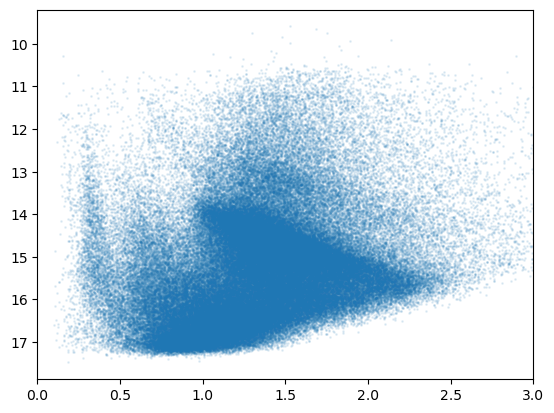

In [106]:
plt.gca().invert_yaxis()
plt.scatter(x, y, s=1, alpha=0.1)
plt.xlim(0,3)

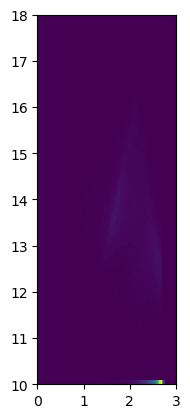

In [88]:
#hist2d(catalog['phot_h_mean_mag']-catalog['phot_ks_mean_mag'], catalog['phot_ks_mean_mag'], bins, cmap=plt.cm.jet)
xedges = np.linspace(0, 3, num=100)
yedges = np.linspace(10, 18, num=100)
H, binx, biny = np.histogram2d(x, y, bins=(xedges, yedges))
plt.imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [127]:
np.geomspace(0.2, 1, num=5)

array([0.2       , 0.29906976, 0.4472136 , 0.6687403 , 1.        ])

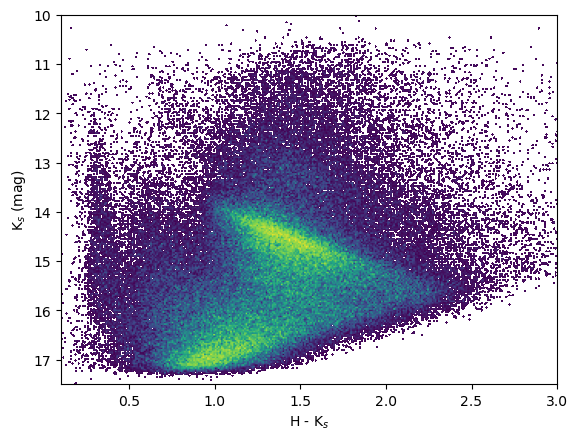

In [131]:
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.1, '#404388'),
    (0.2, '#2a788e'), #0.4
    (0.3, '#21a784'),  #0.6
    (0.5, '#78d151'), #0.8
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    #fig.colorbar(density, label='Number of points per pixel')

x = catalog['phot_h_mean_mag']-catalog['phot_ks_mean_mag']
y = catalog['phot_ks_mean_mag']

fig = plt.figure()
using_mpl_scatter_density(fig, x, y)
plt.xlim(0.1, 3)
plt.xlabel('H - K$_s$')
plt.ylim(10, 17.5)
plt.ylabel('K$_s$ (mag)')
plt.gca().invert_yaxis()
plt.show()

In [135]:
mist.columns

<TableColumns names=('EEP','log10_isochrone_age_yr','initial_mass','star_mass','log_Teff','log_g','log_L','[Fe/H]_init','[Fe/H]','VISTA_Z','VISTA_Y','VISTA_J','VISTA_H','VISTA_Ks','phase')>

<Figure size 960x720 with 0 Axes>

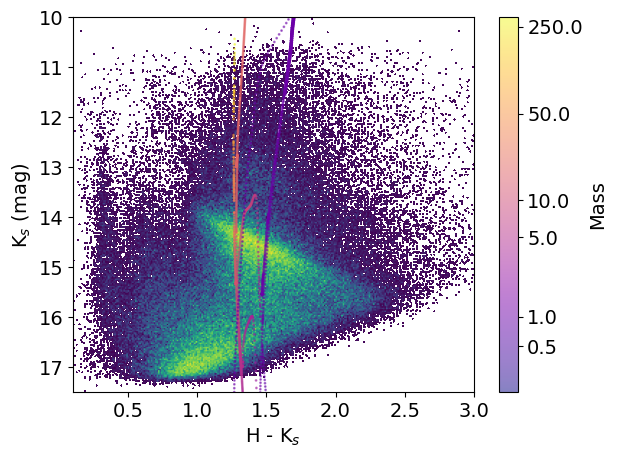

In [225]:
plt.figure(dpi=150)

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.1, '#404388'),
    (0.2, '#2a788e'), #0.4
    (0.3, '#21a784'),  #0.6
    (0.5, '#78d151'), #0.8
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    #fig.colorbar(density, label='Number of points per pixel')

x1 = catalog['phot_h_mean_mag']-catalog['phot_ks_mean_mag']
y1 = catalog['phot_ks_mean_mag']

x = x1[~(x1<0.1)]
y = y1[~(x1<0.1)]

ext = CT06_MWGC()
av = 22

fig = plt.figure()
using_mpl_scatter_density(fig, x, y)


norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
for age in np.unique(mist['log10_isochrone_age_yr']):
    #if age in (5, 10):
    if age in (5,6,7,10):
        agesel = mist['log10_isochrone_age_yr'] == age
        A_H = ext(16458.24*u.Angstrom) * av
        A_Ks = ext(21479.56*u.Angstrom) * av
        H = mist['VISTA_H'][agesel] + A_H + distance_modulus
        Ks = mist['VISTA_Ks'][agesel] + A_Ks + distance_modulus
        plt.scatter(H - Ks,
                   Ks,
                   c=mist['initial_mass'][agesel],
                   norm=norm,
                   cmap='plasma',
                   alpha=0.5,
                   s=1,
                  )


cb = plt.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("Mass")

pl.axhline(0, linestyle='--', color='k')
pl.axvline(0, linestyle='--', color='k')
plt.xlim(0.1, 3)
plt.xlabel('H - K$_s$')
plt.ylim(10, 17.5)
plt.ylabel('K$_s$ (mag)')
plt.gca().invert_yaxis()
plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.savefig('/orange/adamginsburg/cmz/sgre/colormag_HKs.png')
plt.show()


In [217]:
pwd

'/orange/adamginsburg/cmz/sgre'

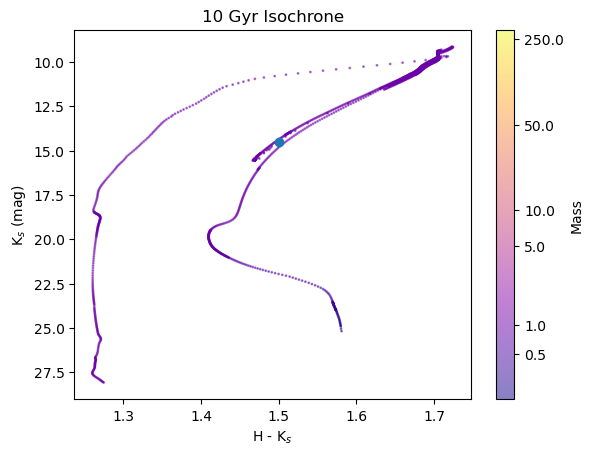

In [216]:

ext = CT06_MWGC()
av = 22

norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
for age in np.unique(mist['log10_isochrone_age_yr']):
    if age == 10.0:
    #if age in (5,6,7,10):
        agesel = mist['log10_isochrone_age_yr'] == age
        A_H = ext(16458.24*u.Angstrom) * av
        A_Ks = ext(21479.56*u.Angstrom) * av
        H = mist['VISTA_H'][agesel] + A_H + distance_modulus
        Ks = mist['VISTA_Ks'][agesel] + A_Ks + distance_modulus
        plt.scatter(H - Ks,
                   Ks,
                   c=mist['initial_mass'][agesel],
                   norm=norm,
                   cmap='plasma',
                   alpha=0.5,
                   s=1,
                  )


cb = plt.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("Mass")

plt.scatter(1.5, 14.5)

#pl.axhline(0, linestyle='--', color='k')
#pl.axvline(0, linestyle='--', color='k')
#plt.xlim(-0.15, 3)
plt.xlabel('H - K$_s$')
#plt.ylim(10, 17.5)
plt.ylabel('K$_s$ (mag)')
plt.title('10 Gyr Isochrone')
plt.gca().invert_yaxis()
plt.show()

In [179]:
(10*u.Gyr).to(u.yr)

<Quantity 1.e+10 yr>

In [166]:
A_H

6.745728398194402

In [167]:
A_Ks

3.5424198276678167

In [173]:
distance_modulus

14.647094628571466